In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_csv("/content/Life-Expectancy-Data-Averaged.csv")

print(df[:5])

               Country                         Region    Year  Infant_deaths  \
0          Afghanistan                           Asia  2007.5       71.08125   
1              Albania                 Rest of Europe  2007.5       15.25625   
2              Algeria                         Africa  2007.5       26.75625   
3               Angola                         Africa  2007.5       88.76875   
4  Antigua and Barbuda  Central America and Caribbean  2007.5        9.47500   

   Under_five_deaths  Adult_mortality  Alcohol_consumption  Hepatitis_B  \
0           98.61250       265.804969             0.016125      64.5625   
1           17.14375        83.132969             4.696875      98.0000   
2           31.19375       113.439281             0.400625      88.3125   
3          144.16250       297.844063             4.935625      68.8125   
4           11.51875       142.478813             7.755000      98.2500   

   Measles       BMI    Polio  Diphtheria  Incidents_HIV  GDP_per_ca

In [4]:
#create new dataframe with necessary columns only
life_df = pd.DataFrame(df, columns = ['Country', 'Life_expectancy', 'Adult_mortality', 'Alcohol_consumption', 'BMI', 'Incidents_HIV', 'GDP_per_capita', 'Thinness_ten_nineteen_years', 'Schooling'])

#Cleaning:
#Remove whitespace
life_df.columns = life_df.columns.str.strip()

#Drop any nas
life_df = life_df.dropna(subset = ['Country', 'Life_expectancy', 'Adult_mortality', 'Alcohol_consumption', 'BMI', 'Incidents_HIV', 'GDP_per_capita', 'Thinness_ten_nineteen_years', 'Schooling'])
life_df[:5]

,Country,Life_expectancy,Adult_mortality,Alcohol_consumption,BMI,Incidents_HIV,GDP_per_capita,Thinness_ten_nineteen_years,Schooling
0,Afghanistan,59.65625,265.804969,0.016125,22.46250,0.022500,408.5625,16.58125,2.90000
1,Albania,75.95000,83.132969,4.696875,25.85625,0.025625,3071.1250,1.61875,9.24375
2,Algeria,73.78750,113.439281,0.400625,24.86875,0.021875,3745.1250,6.09375,6.99375
3,Angola,52.82500,297.844063,4.935625,22.51875,1.303750,2647.8125,6.19375,4.60625
4,Antigua and Barbuda,75.35000,142.478813,7.755000,25.85000,0.125000,14678.7500,3.42500,9.01875


In [5]:
features = ['Adult_mortality', 'Alcohol_consumption', 'BMI', 'Incidents_HIV', 'GDP_per_capita', 'Thinness_ten_nineteen_years', 'Schooling']

X = life_df[features]
y = life_df['Life_expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train[:5])
print(y_train[:5])
print(X_test[:5])
print(y_test[:5])

     Adult_mortality  Alcohol_consumption       BMI  Incidents_HIV  \
158       171.150406             6.438750  23.56250       0.335625   
134       303.889719             7.718125  21.48125       1.621875   
87         74.596594             0.016000  28.86250       0.130000   
99        128.308219             0.516875  24.73750       0.195625   
77        173.149281             0.169250  27.77500       0.130000   

     GDP_per_capita  Thinness_ten_nineteen_years  Schooling  
158       4739.2500                      8.54375    7.11875  
134        534.7500                      6.63125    3.18125  
87       34269.6875                      3.28125    6.48750  
99        7868.7500                      8.61250    9.06250  
77        3989.1875                      5.40000    6.03125  
158    73.20000
134    58.95000
87     74.01875
99     74.03750
77     68.78125
Name: Life_expectancy, dtype: float64
    Adult_mortality  Alcohol_consumption       BMI  Incidents_HIV  \
9        144.664344 

In [25]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict life expectancy on the test set
y_pred = model.predict(X_test)

In [26]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error: 1.430099176195372
Mean Squared Error: 4.134361604450186
R^2 Score: 0.9564701748332034


In [27]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))

                       Feature  Coefficient
6                    Schooling     0.553215
3                Incidents_HIV     0.428306
1          Alcohol_consumption     0.150545
2                          BMI     0.110047
4               GDP_per_capita    -0.000001
5  Thinness_ten_nineteen_years    -0.022627
0              Adult_mortality    -0.072856


In [29]:
actual_values = y_test
predicted_values = y_pred
countries = df.loc[y_test.index, "Country"]

comparison_df = pd.DataFrame({
    "Country": countries,
    "Actual Values": actual_values,
    "Predicted Values": predicted_values,
    "Error": abs(actual_values - predicted_values)
})

top5 = comparison_df.sort_values(by='Error', ascending=False).head(5)
print(top5)

                   Country  Actual Values  Predicted Values     Error
3                   Angola       52.82500         59.492533  6.667533
52                 Eritrea       60.28125         56.569648  3.711602
161                  Tonga       69.99375         73.629654  3.635904
9               Azerbaijan       69.72500         73.317163  3.592163
106  Micronesia, Fed. Sts.       65.96875         69.523557  3.554807


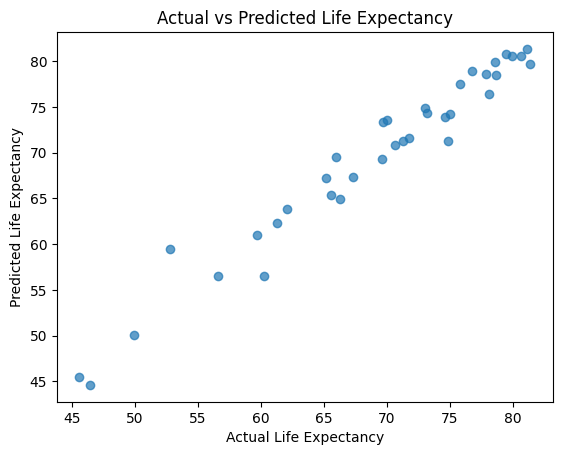